## Univariate Timeseries Classification

In [7]:
import os
import pandas as pd

filename = os.path.join("data", "arrowhead", "ArrowHead.txt")
data = pd.read_csv(filename, sep='  ', header=None, engine="python")

X_train_orig = data.iloc[:, 1:]
y_train_orig = pd.get_dummies(data.iloc[:, 0].astype('int'))

In [8]:
from pyreal.transformers import DimensionAdder

formatter = DimensionAdder()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.get_logger().setLevel('INFO')

model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=(X_train_orig.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3))

model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)


In [10]:
model.fit(formatter.transform(X_train_orig), y_train_orig, epochs=5, batch_size=16)

Epoch 1/5
3/3 [==============================] - 1s 57ms/step - loss: 0.9582 - accuracy: 0.5278
Epoch 2/5
3/3 [==============================] - 0s 56ms/step - loss: 0.9201 - accuracy: 0.5278
Epoch 3/5
3/3 [==============================] - 0s 58ms/step - loss: 0.9225 - accuracy: 0.6389
Epoch 4/5
3/3 [==============================] - 0s 56ms/step - loss: 0.9298 - accuracy: 0.5833
Epoch 5/5
3/3 [==============================] - 0s 56ms/step - loss: 0.9146 - accuracy: 0.5278


In [11]:
import importlib
import pyreal.explainers.time_series.saliency.univariate_occlusion_saliency as oi
import time

transformers = [formatter]

explainer = oi.UnivariateOcclusionSaliency(model, X_train_orig, transformers=transformers, width=5, k=0, classes=[1, 2, 3])
explainer.fit()

start = time.time()
explanation1 = explainer.produce(X_train_orig.iloc[0])
explanation2 = explainer.produce(X_train_orig.iloc[1])

1/1 [==============================] - 0s 19ms/step


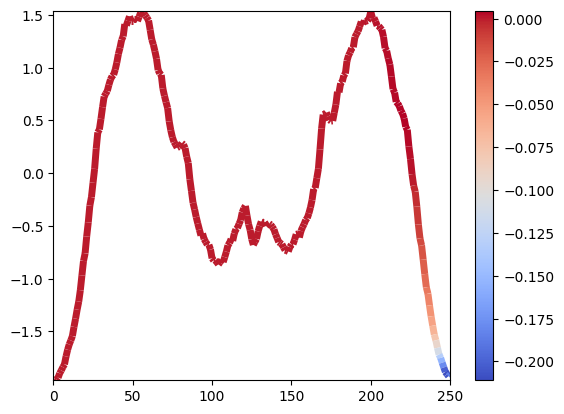

In [12]:
import pyreal.visualize as vis

vis.plot_timeseries_saliency(X_train_orig.iloc[0], explanation1.get().iloc[0, :])